### A simple JTK cycle analysis. This may or may be produce p-values that are meaningful. Please don't use this for anything serious.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from sklearn.preprocessing import minmax_scale

In [3]:
# Cook some sample data
time_points = np.arange(0,24,2)
period = 24
amplitude = 2
phase_shift = np.random.uniform(0, period)
data =  amplitude * np.sin(2 * np.pi * (np.array(time_points) - phase_shift) / period)

# Add some noise
noise_level = np.random.normal(amplitude/10, amplitude)
data += np.random.normal(0, noise_level, len(data))

# Normalize the data
data = minmax_scale(data)

In [10]:
# Generate template for 24-hour rhythm  - a sine wave
template = minmax_scale(np.sin(2 * np.pi * time_points / 24))
ranked_template = np.argsort(np.argsort(template))

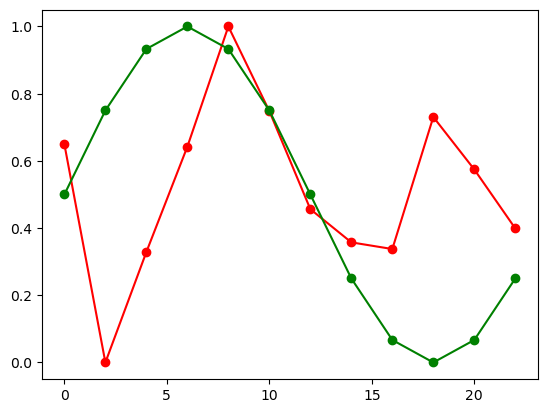

In [19]:
# Plot the data and the template
plt.plot(time_points, data, 'o-', label='Data', color='red')
plt.plot(time_points, template, 'o-', label='Template', color='green')

In [12]:
# Rank order the data
ranked_data = np.argsort(np.argsort(data))

In [13]:
# Calculate Kendall's Tau
tau, p_value = kendalltau(ranked_data, ranked_template)

In [14]:
# print the pvalue.
# Note: Most likely the p-value is not meaningful as we are testing a single template wave against the data. Ideally, you want to use multiple waves to test against the data.
tau, p_value

(0.0606060606060606, 0.8405883696421891)

In [15]:
ranked_data

array([ 8,  0,  1,  7, 11, 10,  5,  3,  2,  9,  6,  4])